## Данный файл предназначен для того, чтобы разобраться как строить графики по данным из файлов .csv

`Ниже будут представлены полезные ссылки, которые мне помогали с составлением этого файла.`

---> https://pythonru.com/primery/pandas-na-primerah 
-Работа с pandas

---> https://ru.hexlet.io/courses/python-pandas/lessons/index-rules/theory_unit 
-Работа с индексами в pandas

--> https://sky.pro/wiki/pythonustranyaem-indeks-stolbets-v-pandas-csv-bez-key-error/ 
-Устраняем индекс-столбец в pandas CSV: без KeyError

---> https://www.codecamp.ru/blog/drop-index-pandas/ 
-Как удалить столбец индекса в Pandas (с примерами)

---> https://www.youtube.com/watch?v=LLFOZ2vN7ss&t=902s 
-Как оформить текст в Jupyter Notebook с помощью Markdown

### 4.3 Настройка усилителя мощности

In [112]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

In [113]:
# Считаем данные из CSV-файла 
# ctrl + / - закомментировать кусок кода
Ik_data = pd.read_csv('lk.csv', index_col= False) # Чтение файла в переменную data
UZ3_data = pd.read_csv('scope_csv_32_1_uz3.csv', index_col= False) # Чтение файла в переменную data

### Посмотрим как отображается наша таблица. Выведем её верхнюю часть

In [114]:
Ik_data.head()

,Time [s],CH2 [V]
0,1.000000e-09,-0.136
1,1.000000e-09,-0.136
2,1.000000e-09,-0.128
3,1.000000e-09,-0.128
4,1.000000e-09,-0.136


In [115]:
UZ3_data.head()

,Time [s],CH2 [V]
0,1.000000e-09,-0.006
1,1.000000e-09,0.004
2,1.000000e-09,0.012
3,1.000000e-09,0.018
4,1.000000e-09,0.026


### Проверим как отображается .csv таблица

In [116]:
print(Ik_data['Time [s]'].head(10))  # Проверим первые 10 значений CH2 после очистки
print(Ik_data['CH2 [V]'].head(10))  # Проверим первые 10 значений CH2 после очистки

0    1.000000e-09
1    1.000000e-09
2    1.000000e-09
3    1.000000e-09
4    1.000000e-09
5    1.000000e-09
6    1.000000e-09
7    1.000000e-09
8    1.000000e-09
9    1.000000e-09
Name: Time [s], dtype: float64
0   -0.136
1   -0.136
2   -0.128
3   -0.128
4   -0.136
5   -0.136
6   -0.136
7   -0.128
8   -0.144
9   -0.128
Name: CH2 [V], dtype: float64


#### Полученные данные соответствуют своим столбцам, значит можно переходить к построению графиков.
Учтём, что:

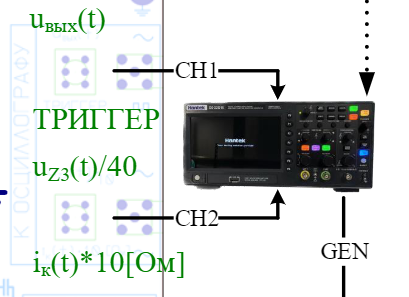

### Пункт 4.2 Графики Uz3(t) и Ik(t)

In [117]:
discrete_time = 1.000000e-09 # значение дискрета по времени, взятое из таблицы csv
# Создание вектора времени
time = np.arange(0, 300 * discrete_time, discrete_time)
# Перевод времени в наносекунды (умножаем на 10^9)
time_ns = time * 1e9

#Постоянная составляющая Ik = Iэ0нач*Rсм / Rсм
#Rсм = 300

Ik = 1e3 * (0.012 + (1/10) * Ik_data.iloc[0:300]['CH2 [V]'])
UZ3 = 40 * UZ3_data.iloc[0:300]['CH2 [V]']


#display(ch1.iloc[1000]) # iloc() — метод выбора строк согласно их числовой позиции
                        #loc() — метод выбора данных на основе меток строк


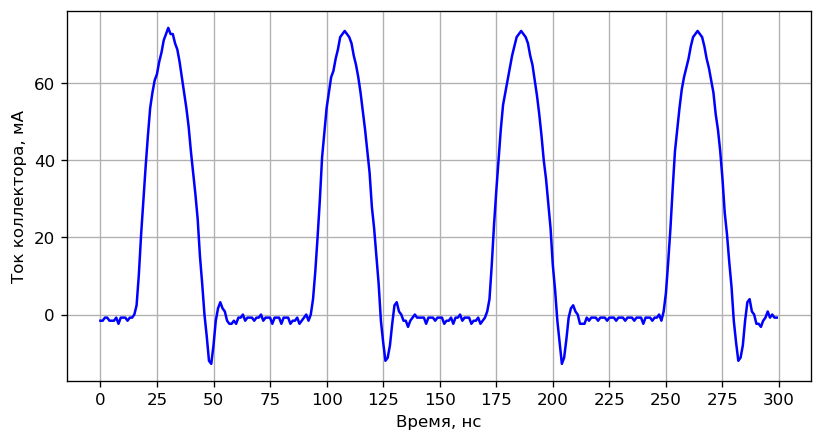

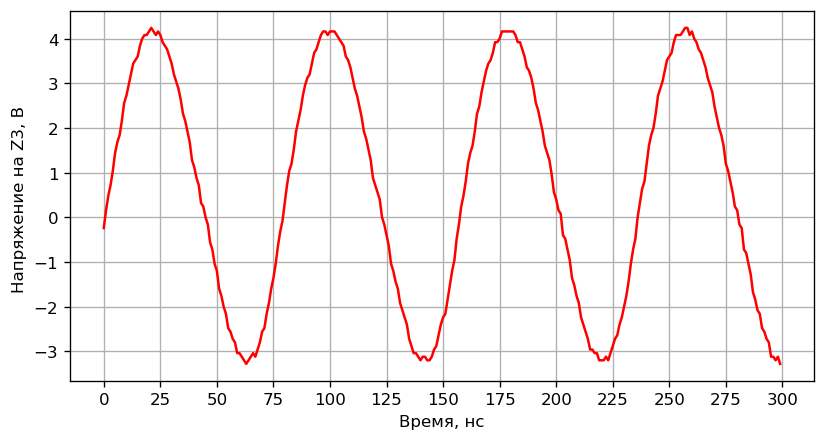

In [118]:
# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)

new_xticks = np.arange(0, 301, 25)  # Задаем метки от 25 до 200 наносекунд с шагом 25 нс

# Осциллограмма для CH1
plt.plot(time_ns, Ik, color='blue')
plt.xlabel('Время, нс')
plt.ylabel('Ток коллектора, мА')
plt.grid(True)
plt.xticks(new_xticks)
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
plt.plot(time_ns, UZ3, color='red')
plt.xlabel('Время, нс')
plt.ylabel('Напряжение на Z3, В ')
plt.grid(True)
plt.xticks(new_xticks)
plt.show()


### 4.4 Нагрузочные характеристики

### Пункт 4.3 Графики Ik_rising(t), Ik_falling(t)

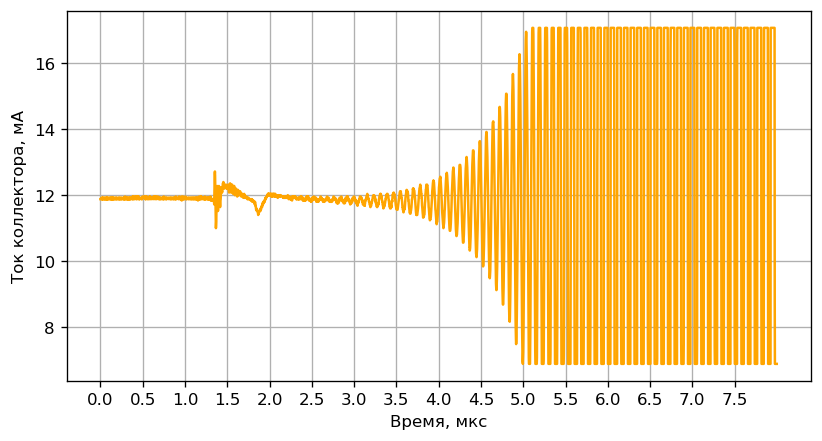

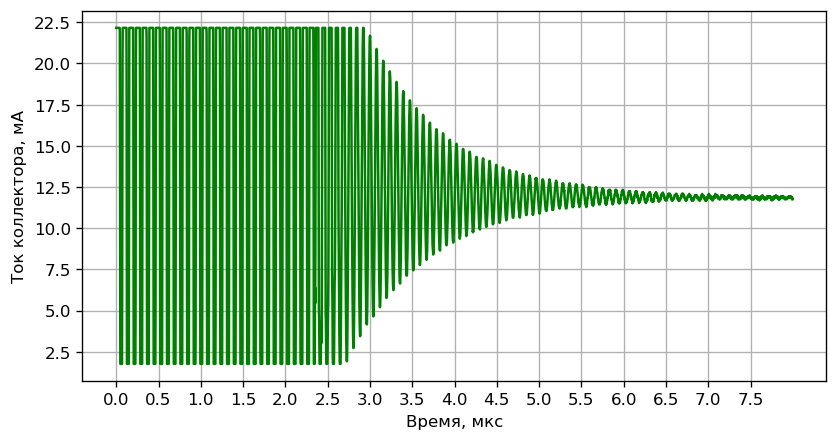

In [119]:
discrete_time = 2.000000e-09 # значение дискрета по времени, взятое из таблицы csv
# Создание вектора времени
time = np.arange(0, 4000 * discrete_time, discrete_time)[0:4000]
# Перевод времени в наносекунды (умножаем на 10^9)
time_ns = time * 1e6

Ik_falling_data = pd.read_csv('Ik_4_3_8 (3).csv', index_col= False)
Ik_rising_data = pd.read_csv('Ik_4_3_7 (3).csv', index_col= False)


Ik_rising = 1e3 * (0.012 + (1/10) * Ik_rising_data.iloc[0:4001]['CH2 [V]'])
Ik_falling = 1e3 * (0.012 + (1/10) * Ik_falling_data.iloc[0:4001]['CH2 [V]'])

new_xticks = np.arange(0, 8, 0.5)


#print(len(Ik_rising))
#print(len(time))

# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH1
plt.plot(time_ns, Ik_rising, color='orange')
plt.xlabel('Время, мкс')
plt.ylabel('Ток коллектора, мА')
plt.grid(True)
plt.xticks(new_xticks)
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH2
plt.plot(time_ns, Ik_falling, color='green')
plt.xlabel('Время, мкс')
plt.ylabel('Ток коллектора, мА')
plt.grid(True)
plt.xticks(new_xticks)
plt.show()


### Поиск Uz3

In [120]:
from scipy.signal import find_peaks

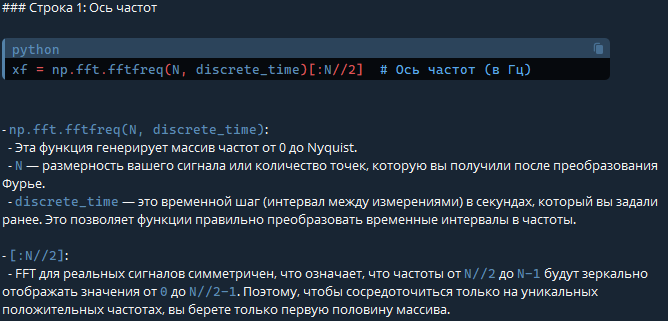
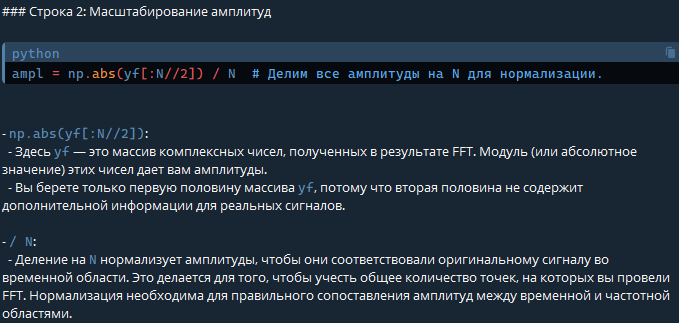
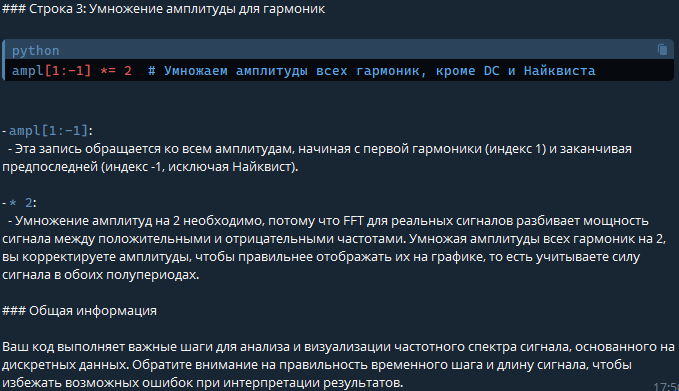

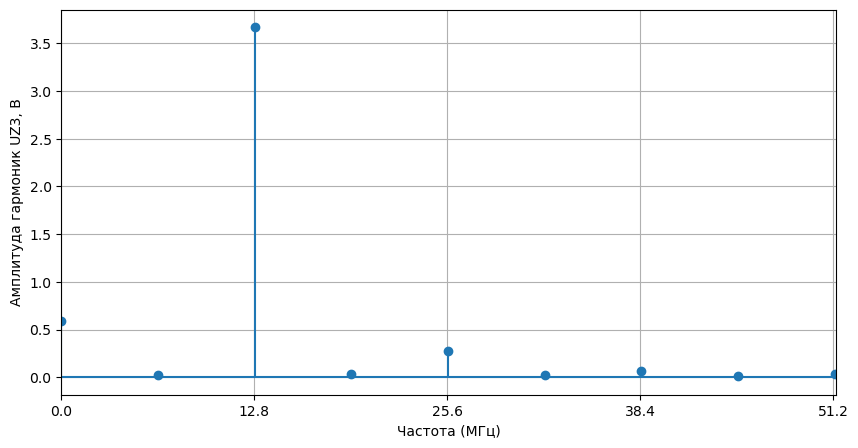

Амплитуда UZ3: 3.669782557007558


In [ ]:
# Параметры сигнала
frequency = 12.8e6  # Частота сигнала 12.8 МГц
period = 1 / frequency  # Период основного сигнала (секунды)
discrete_time = 1.000000e-09


# Количество точек на период (в секундах)
points_per_period = int(period / discrete_time)

# Убедимся, что количество точек соответствует целому числу периодов
num_periods = 2  # Количество периодов, которые мы хотим захватить
total_points = num_periods * points_per_period  # Всего точек

# Предположим, что NR_ch2 содержит данные осциллограммы
UZ3_segment = UZ3[:total_points]  # Обрезаем данные до целого числа периодов

# Преобразование Фурье
N = len(UZ3_segment)  # Количество точек
yf = np.fft.fft(UZ3_segment)
xf = np.fft.fftfreq(N, discrete_time)[:N//2]  # Ось частот (в Гц)

# Масштабирование амплитуд
ampl = np.abs(yf[:N//2]) / N #! Делим все амплитуды на N для нормализации.
ampl[1:-1] *= 2  # Умножаем амплитуды всех гармоник, кроме DC и Найквиста

# Преобразуем частоты в МГц
xf_mhz = xf / 1e6

# Построение графика спектра
plt.figure(figsize=(10, 5))

new_xticks = np.arange(0, np.max(xf_mhz), 12.8) 
plt.xticks(new_xticks)
plt.xlim(0, 51.4)
plt.stem(xf_mhz, ampl, basefmt="C0")
plt.xlabel('Частота (МГц)')
plt.ylabel('Амплитуда гармоник UZ3, В')
plt.grid(True)
plt.show()

# Вывод амплитуды DC-компоненты для проверки
print(f'Амплитуда UZ3: {ampl[2]}')


